In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=3bd9d6b62694ae232194cb587af0ac4f662d2a149c6844b63947e6c3433a5746
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Kemiripan antara dua wajah adalah: 41.5005545092162 %


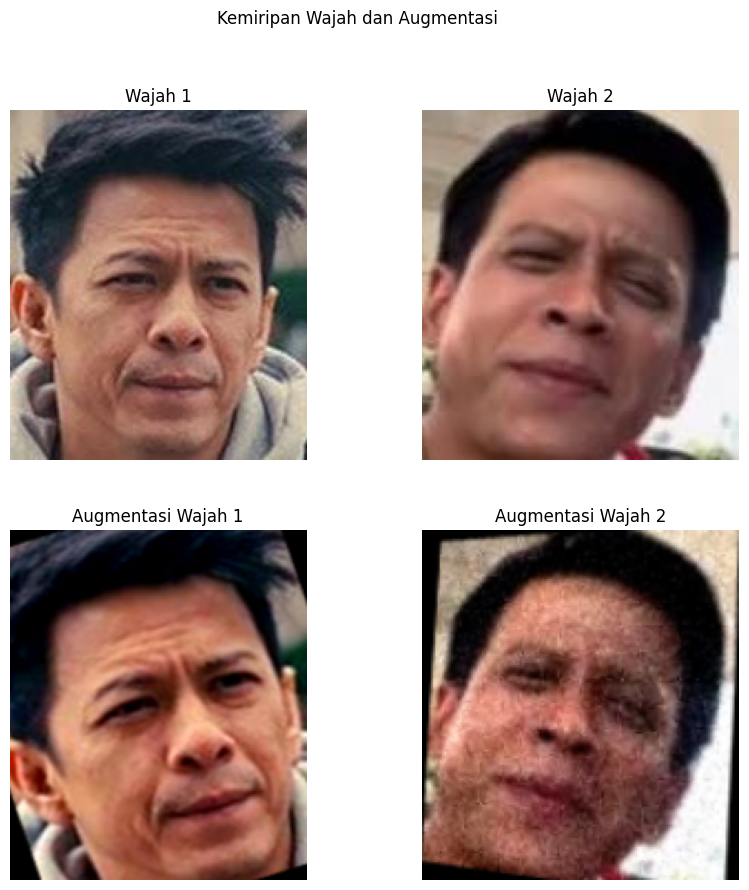

In [6]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

def hitung_kemiripan_wajah(foto_1, foto_2):
    # Menggunakan library face_recognition untuk memuat gambar dan mengenali wajah
    gambar_1 = face_recognition.load_image_file(foto_1)
    gambar_2 = face_recognition.load_image_file(foto_2)

    # Mengambil lokasi wajah pada gambar
    wajah_1 = face_recognition.face_locations(gambar_1)
    wajah_2 = face_recognition.face_locations(gambar_2)

    # Menghasilkan encoding (vektor fitur) untuk setiap wajah
    encoding_1 = face_recognition.face_encodings(gambar_1, wajah_1)
    encoding_2 = face_recognition.face_encodings(gambar_2, wajah_2)

    if len(encoding_1) == 0 or len(encoding_2) == 0:
        # Jika tidak ada wajah yang terdeteksi pada salah satu gambar
        return 0.0

    # Mengkonversi daftar vektor fitur menjadi array NumPy
    encoding_1 = np.array(encoding_1)
    encoding_2 = np.array(encoding_2)

    # Menghitung kemiripan menggunakan metode euclidean distance
    kemiripan = np.linalg.norm(encoding_1 - encoding_2, axis=1)

    # Mengembalikan nilai kemiripan antara 0 dan 1 (semakin dekat ke 0, semakin mirip)
    return 1 - kemiripan[0]

# Contoh penggunaan
foto_1 = "ariel.jpg"
foto_2 = "ariel_kw1.jpg"

kemiripan = hitung_kemiripan_wajah(foto_1, foto_2)
print("Kemiripan antara dua wajah adalah:", kemiripan * 100, "%")

# Augmentasi gambar
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal secara acak
    iaa.Affine(rotate=(-20, 20)),  # Rotasi gambar dengan rentang -20 hingga 20 derajat
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Penambahan Gaussian blur secara acak
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # Penambahan noise Gaussian secara acak
    iaa.ContrastNormalization((0.5, 2.0)),  # Normalisasi kontras secara acak
    iaa.Affine(scale=(0.8, 1.2)),  # Skala gambar dengan rentang 0.8 hingga 1.2
    iaa.Sometimes(0.5, iaa.PerspectiveTransform(scale=(0.01, 0.1)))  # Transformasi perspektif dengan kemungkinan 50%
])

# Memuat gambar dan menampilkan kemiripan wajah
gambar_1 = plt.imread(foto_1)
gambar_2 = plt.imread(foto_2)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Menampilkan gambar asli
ax[0, 0].imshow(gambar_1)
ax[0, 0].axis('off')
ax[0, 0].set_title('Wajah 1')

ax[0, 1].imshow(gambar_2)
ax[0, 1].axis('off')
ax[0, 1].set_title('Wajah 2')

# Augmentasi gambar 1
gambar_augmented_1 = seq.augment_image(gambar_1)
ax[1, 0].imshow(gambar_augmented_1)
ax[1, 0].axis('off')
ax[1, 0].set_title('Augmentasi Wajah 1')

# Augmentasi gambar 2
gambar_augmented_2 = seq.augment_image(gambar_2)
ax[1, 1].imshow(gambar_augmented_2)
ax[1, 1].axis('off')
ax[1, 1].set_title('Augmentasi Wajah 2')

plt.suptitle('Kemiripan Wajah dan Augmentasi')
plt.show()
